# DATA PREPROCESSING IN MACHINE LEARNING

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.<br>
<br>
The type of cleaning and engineering strategies used usually depend on the business problem and type of target variable, since this will influence the algorithm and data preparation requirements.
<br>

You almost always need to preprocess your data. It is a required step.<br>
<br>
A difficulty is that different algorithms make different assumptions about your data and may require different transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms can deliver better results without the preprocessing.<br>
<br>
Generally, I would recommend creating many different views and transforms of your data, then exercise a handful of algorithms on each view of your dataset. This will help you to flush out which data transforms might be better at exposing the structure of your problem in general.
<br>
<br>
#### Why Preprocessing ?<br>
Real world data are generally<br>
<br>
__Incomplete__: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data<br>
__Noisy__: containing errors or outliers<br>
__Inconsistent__: containing discrepancies in codes or names<br>

#### Tasks in data preprocessing<br>
__Data cleaning__: fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies.<br>
__Data integration__: using multiple databases, data cubes, or files.<br>
__Data transformation__: normalization and aggregation.<br>
__Data reduction__: reducing the volume but producing the same or similar analytical results.<br>
__Data discretization__: part of data reduction, replacing numerical attributes with nominal ones.<br>






<img src="images/mlflow.png">

## Motivation


Feature engineering is an essential part of building any intelligent system. Even though you have a lot of newer methodologies coming in like deep learning and meta-heuristics which aid in automated machine learning, each problem is domain specific and better features (suited to the problem) is often the deciding factor of the performance of your system. Feature Engineering is an art as well as a science and this is the reason Data Scientists often spend 70% of their time in the data preparation phase before modeling. Let’s look at a few quotes relevant to feature engineering from several renowned people in the world of Data Science.

<br>
“Coming up with features is difficult, time-consuming, requires expert knowledge. ‘Applied machine learning’ is basically feature engineering.” <br>
— Prof. Andrew Ng.

## DATASET AND LIBRARY

We will be using Loan Prediction dataset which is avaiable in my github. The most popular framework for machine learning in python is __scikit-learn__ 

## IMPORT DATA

In [1]:
import pandas as pd

# training data
X_train=pd.read_csv('loan_prediction/X_train.csv')
Y_train=pd.read_csv('loan_prediction/Y_train.csv')

# test data
X_test=pd.read_csv('loan_prediction/X_test.csv')
Y_test=pd.read_csv('loan_prediction/Y_test.csv')

In [2]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,5149.718750,1572.077917,141.471354,342.093750,0.856771
std,5304.921764,2624.223119,75.176271,65.846658,0.350763
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3893.500000,1188.500000,128.000000,360.000000,1.000000
75%,5819.500000,2259.250000,164.250000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


## MISSING VALUES

In [3]:
X_train.isnull().sum(axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In this case we do not have any missing values but in real time we might have missing values and we can use the following code in which we fill the missing values with the mean value of that feature
<br>
<br>
X_train = X_train.fillna({"ApplicantIncome": X_train["ApplicantIncome"].mean(), "LoanAmount": X_train["LoanAmount"].mean()
                     })
<br>
<br>
Instead of replacing with mean we can also replace with median which behinds on the distribution of data

## DATA VISUALISATION

The first step I would follow is visualize the given data before we proceed. This step will give you an idea behind the data distribution which gives us an insight to whether we have any outliners(noisy data),data scale of the given feature and so on.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B1E1EB5080>,
      dtype=object)

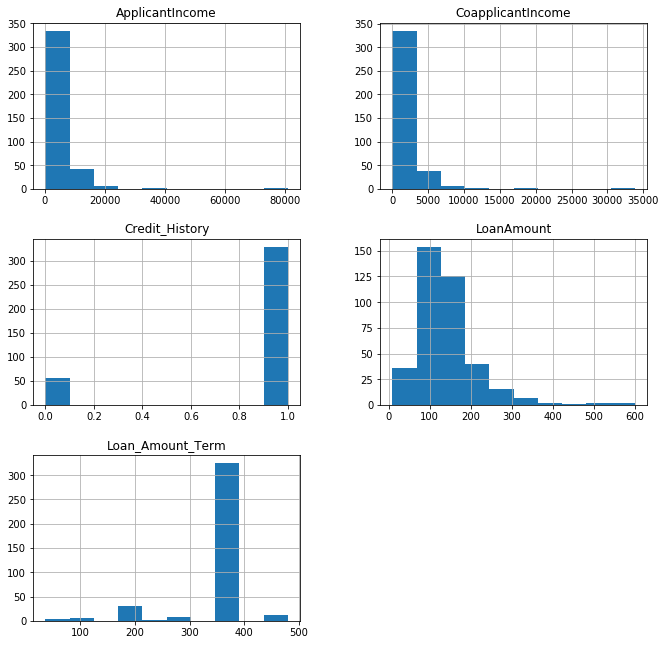

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])


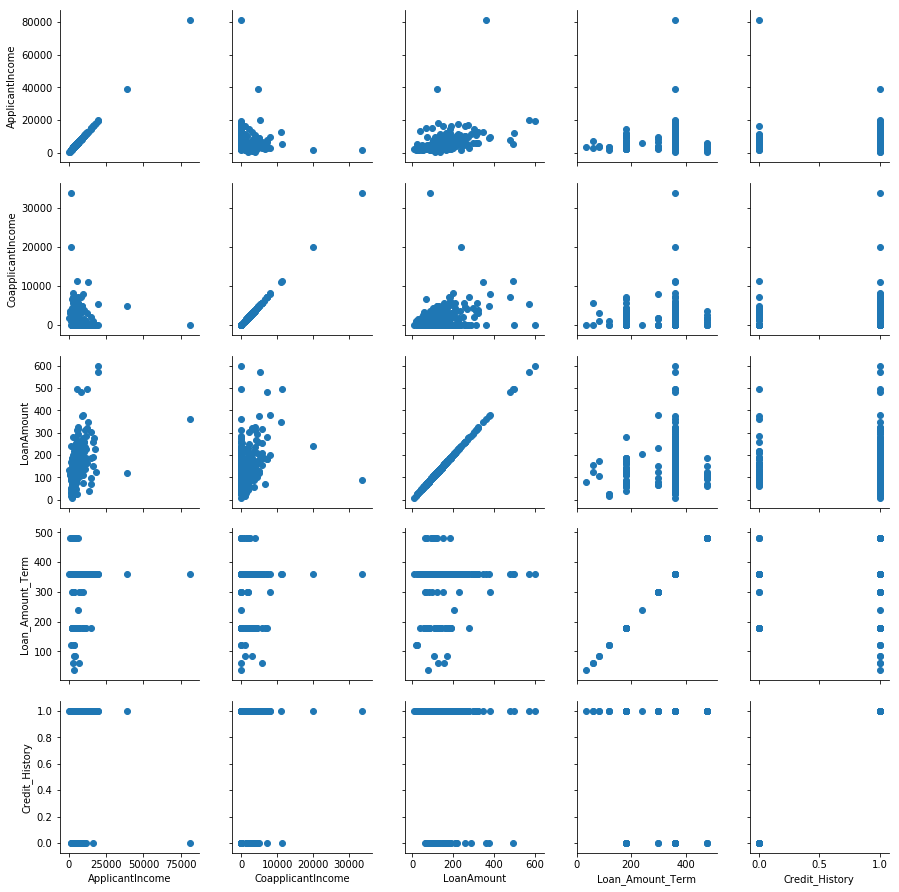

In [5]:
import seaborn as sns
g = sns.PairGrid(X_train)
g.map(plt.scatter)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']],Y_train)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome',
                             'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))

C:\Users\Sandheep\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.6145833333333334

We got around 61% of correct prediction which is not bad but in real world practices will this be enough ? Can we deploy this model in real world problem? To answer this question lets take a look at distribution of Loan_Status in train data set.

In [7]:
Y_train.Target.value_counts()/Y_train.Target.count()

Y    0.705729
N    0.294271
Name: Target, dtype: float64

In [8]:
Y_test.Target.value_counts()/Y_test.Target.count()

Y    0.635417
N    0.364583
Name: Target, dtype: float64

## Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])


In [10]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

C:\Users\Sandheep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.75

## Label Encoding

In previous sections, we did the pre-processing for continuous numeric features. But, our data set has other features too such as Gender, Married, Dependents, Self_Employed and Education. All these categorical features have string values. For example, Gender has two levels either Male or Female. Lets feed the features in our logistic regression model.

In [11]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [12]:
from sklearn.linear_model import LogisticRegression

# Fitting a logistic regression model on whole data
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test))

ValueError: could not convert string to float: 'Semiurban'

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

In [16]:
X_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,13,1,0,0,0,0,4950,0.0,125,360,1,2
1,193,1,1,1,0,0,2882,1843.0,123,480,1,1
2,461,1,1,0,0,0,3000,3416.0,56,180,1,1
3,191,1,1,2,0,0,9703,0.0,112,360,1,2
4,300,1,1,0,0,0,2333,2417.0,136,360,1,2
5,202,1,1,3,0,0,5250,0.0,94,360,1,2
6,365,1,1,0,0,0,4333,2451.0,110,360,1,2
7,448,1,1,2,1,0,6125,1625.0,187,480,1,1
8,139,1,0,0,1,0,2333,1451.0,102,480,0,2
9,238,1,1,0,1,0,1800,2934.0,93,360,0,2


In [17]:
from sklearn.preprocessing import scale
# Standardizing the features
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting the logistic regression model
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the models accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

C:\Users\Sandheep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

Its working now. But, the accuracy is still the same as we got with logistic regression after standardization from numeric features. This means categorical features we added are not very significant in our objective function.

# How can we increase the accuracy ? 


## Additional

__Cross_Validation__
__Feature Engineering__ <br>
__Binning__<br>
__Interpolation__<br>
__Rounding__<br>
__Remove Duplicate__<br>
__Dealing with time__<br>
__Log/Box-cox transform__<br>
